In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
clinico = pd.read_csv('Teste/ICL_NREVSS_Clinical_Labs.csv', skiprows=1)
publico = pd.read_csv('Teste/ICL_NREVSS_Public_Health_Labs.csv', skiprows=1)
ili = pd.read_csv('Teste/ILINet.csv', skiprows=1)

# Análise da base **ICL_NREVSS_Clinical_Labs.csv**

Esta base contém dados de **testes laboratoriais realizados em clínicas particulares** nos Estados Unidos.


In [3]:
clinico.head()

REGION TYPE REGION  YEAR  WEEK  TOTAL SPECIMENS  TOTAL A  TOTAL B  \
0    National      X  2020    40            12200       19       21   
1    National      X  2020    41            14924       30       28   
2    National      X  2020    42            15112       27       26   
3    National      X  2020    43            16611       21       21   
4    National      X  2020    44            20552       22       19   

   PERCENT POSITIVE  PERCENT A  PERCENT B  
0          0.327869   0.155738   0.172131  
1          0.388636   0.201018   0.187617  
2          0.350715   0.178666   0.172049  
3          0.252845   0.126422   0.126422  
4          0.199494   0.107046   0.092448

In [4]:
clinico.tail()

REGION TYPE REGION  YEAR  WEEK  TOTAL SPECIMENS  TOTAL A  TOTAL B  \
233    National      X  2025    12            97442     6505     3950   
234    National      X  2025    13            90052     4458     3891   
235    National      X  2025    14            82103     2845     3415   
236    National      X  2025    15            74104     1771     2951   
237    National      X  2025    16            63566     1173     2358   

     PERCENT POSITIVE  PERCENT A  PERCENT B  
233          10.72950    6.67577    4.05369  
234           9.27131    4.95047    4.32084  
235           7.62457    3.46516    4.15941  
236           6.37213    2.38988    3.98224  
237           5.55486    1.84533    3.70953

In [7]:
colunas_a_verificar = ['REGION TYPE', 'REGION']

for coluna in colunas_a_verificar:
    if clinico[coluna].nunique() == 1:
        print(f"Todos os valores da coluna '{coluna}' são iguais.")
    else:
        print(f"A coluna '{coluna}' tem valores diferentes.")

Todos os valores da coluna 'REGION TYPE' são iguais.
Todos os valores da coluna 'REGION' são iguais.


In [8]:
clinico2 = clinico.drop(columns=['REGION', 'REGION TYPE'])

In [10]:
clinico2.head()

YEAR  WEEK  TOTAL SPECIMENS  TOTAL A  TOTAL B  PERCENT POSITIVE  PERCENT A  \
0  2020    40            12200       19       21          0.327869   0.155738   
1  2020    41            14924       30       28          0.388636   0.201018   
2  2020    42            15112       27       26          0.350715   0.178666   
3  2020    43            16611       21       21          0.252845   0.126422   
4  2020    44            20552       22       19          0.199494   0.107046   

   PERCENT B  
0   0.172131  
1   0.187617  
2   0.172049  
3   0.126422  
4   0.092448

In [11]:
def get_date(year, week):
    return datetime.strptime(f'{int(year)}-{int(week)}-1', "%Y-%W-%w")

In [12]:
clinico2['DATE'] = clinico2.apply(lambda x: get_date(x['YEAR'], x['WEEK']), axis=1)

In [25]:
clinico2['TOTAL POSITIVE'] = clinico2['TOTAL A'] + clinico2['TOTAL B']

In [26]:
clinico2.head()

YEAR  WEEK  TOTAL SPECIMENS  TOTAL A  TOTAL B  PERCENT POSITIVE  PERCENT A  \
0  2020    40            12200       19       21          0.327869   0.155738   
1  2020    41            14924       30       28          0.388636   0.201018   
2  2020    42            15112       27       26          0.350715   0.178666   
3  2020    43            16611       21       21          0.252845   0.126422   
4  2020    44            20552       22       19          0.199494   0.107046   

   PERCENT B       DATE  TOTAL POSITIVE  
0   0.172131 2020-10-05              40  
1   0.187617 2020-10-12              58  
2   0.172049 2020-10-19              53  
3   0.126422 2020-10-26              42  
4   0.092448 2020-11-02              41

In [27]:
clinico2.isnull().sum()

YEAR                0
WEEK                0
TOTAL SPECIMENS     0
TOTAL A             0
TOTAL B             0
PERCENT POSITIVE    0
PERCENT A           0
PERCENT B           0
DATE                0
TOTAL POSITIVE      0
dtype: int64

In [28]:
clinico2.dtypes

YEAR                         int64
WEEK                         int64
TOTAL SPECIMENS              int64
TOTAL A                      int64
TOTAL B                      int64
PERCENT POSITIVE           float64
PERCENT A                  float64
PERCENT B                  float64
DATE                datetime64[ns]
TOTAL POSITIVE               int64
dtype: object

<Axes: >

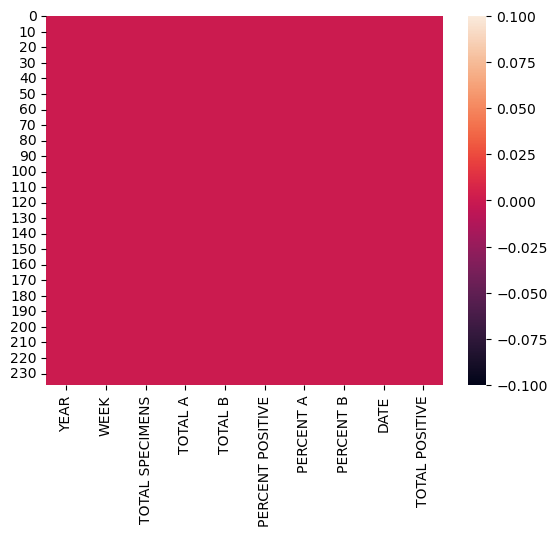

In [98]:
sns.heatmap(clinico2.isnull())

<Axes: xlabel='TOTAL SPECIMENS', ylabel='Count'>

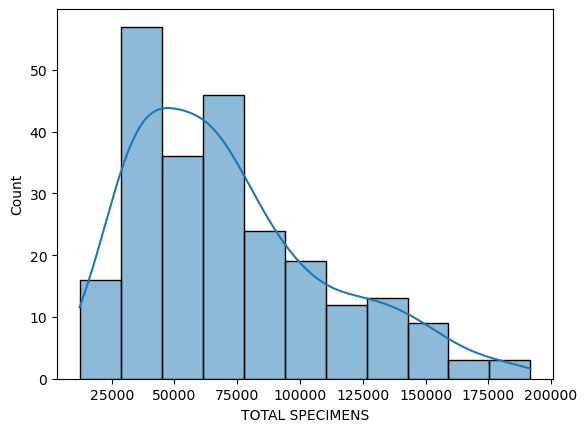

In [141]:
sns.histplot(clinico2['TOTAL SPECIMENS'], kde=True)

In [100]:
clinico2.corr(numeric_only=True)

YEAR      WEEK  TOTAL SPECIMENS   TOTAL A   TOTAL B  \
YEAR              1.000000 -0.278239         0.452969  0.314700  0.483419   
WEEK             -0.278239  1.000000        -0.043846 -0.030156 -0.294636   
TOTAL SPECIMENS   0.452969 -0.043846         1.000000  0.811739  0.463650   
TOTAL A           0.314700 -0.030156         0.811739  1.000000  0.339734   
TOTAL B           0.483419 -0.294636         0.463650  0.339734  1.000000   
PERCENT POSITIVE  0.437434 -0.138291         0.847449  0.947924  0.562604   
PERCENT A         0.364480 -0.082283         0.837407  0.977465  0.396048   
PERCENT B         0.502045 -0.308076         0.377295  0.237161  0.975448   
TOTAL POSITIVE    0.367417 -0.072001         0.831656  0.990242  0.467490   

                  PERCENT POSITIVE  PERCENT A  PERCENT B  TOTAL POSITIVE  
YEAR                      0.437434   0.364480   0.502045        0.367417  
WEEK                     -0.138291  -0.082283  -0.308076       -0.072001  
TOTAL SPECIMENS           0.847449   0.837407   0.377295        0.831656  
TOTAL A                   0.947924   0.977465   0.237161        0.990242  
TOTAL B                   0.562604   0.396048   0.975448        0.467490  
PERCENT POSITIVE          1.000000   0.981044   0.477444        0.974318  
PERCENT A                 0.981044   1.000000   0.298122        0.977405  
PERCENT B                 0.477444   0.298122   1.000000        0.367443  
TOTAL POSITIVE            0.974318   0.977405   0.367443        1.000000

<Axes: >

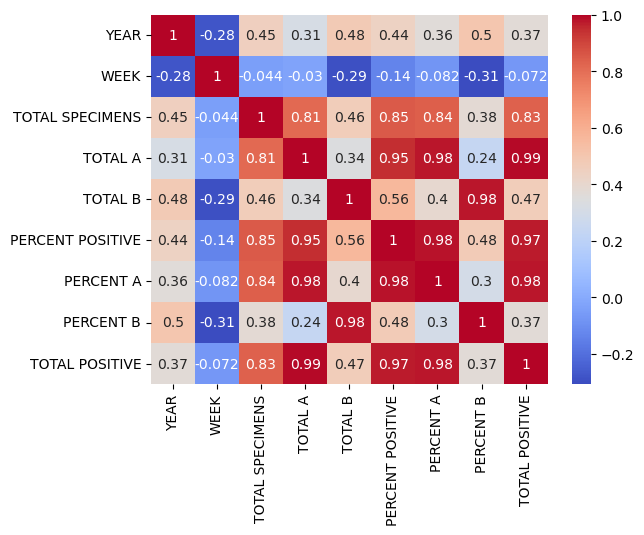

In [101]:
sns.heatmap(clinico2.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='TOTAL A', ylabel='TOTAL POSITIVE'>

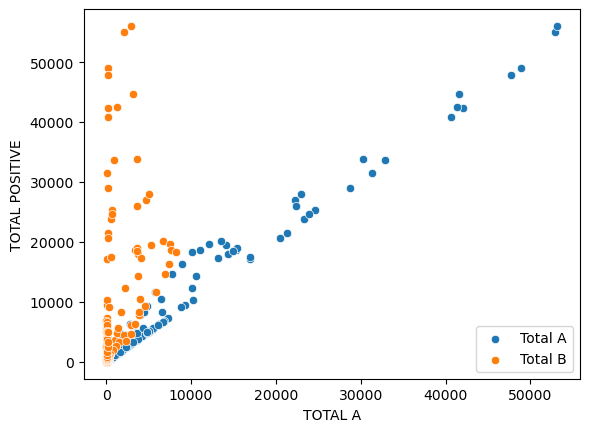

In [164]:
sns.scatterplot(x=clinico2['TOTAL A'], y=clinico2['TOTAL POSITIVE'], label='Total A')
sns.scatterplot(x=clinico2['TOTAL B'], y=clinico2['TOTAL POSITIVE'], label='Total B')

<Axes: >

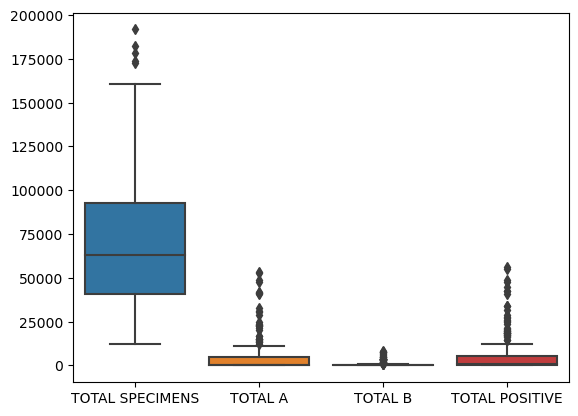

In [165]:
sns.boxplot(data=clinico2[['TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'TOTAL POSITIVE']])

<Axes: xlabel='YEAR', ylabel='PERCENT POSITIVE'>

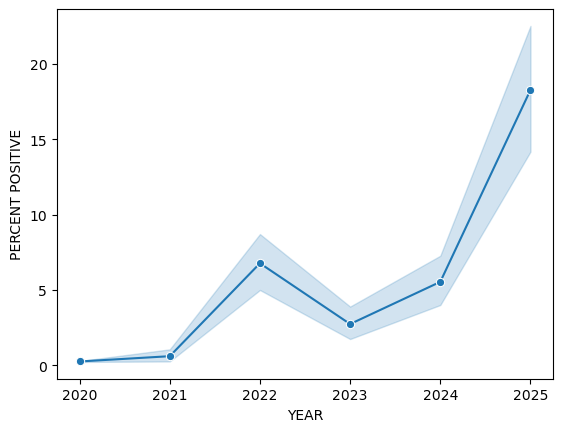

In [166]:
sns.lineplot(data=clinico2, x='YEAR', y='PERCENT POSITIVE', marker='o')

<Axes: xlabel='WEEK', ylabel='TOTAL SPECIMENS'>

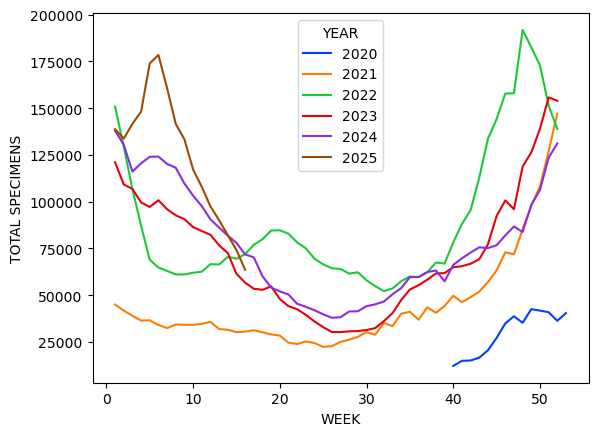

In [67]:
sns.lineplot(data=clinico2, x='WEEK', y='TOTAL SPECIMENS', hue='YEAR', palette='bright')

<Axes: xlabel='WEEK', ylabel='PERCENT POSITIVE'>

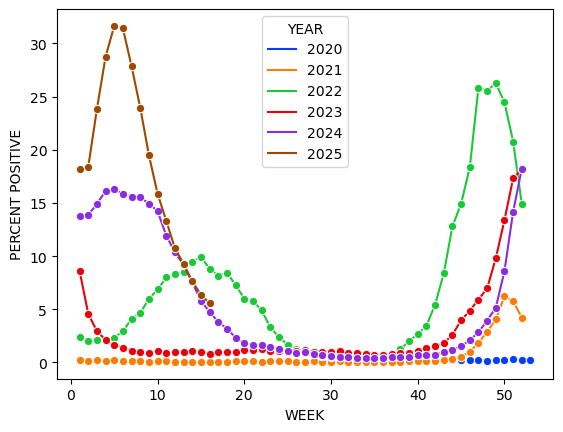

In [167]:
sns.lineplot(data=clinico2, x='WEEK', y='PERCENT POSITIVE', hue='YEAR', marker='o', palette='bright')

<Axes: xlabel='PERCENT POSITIVE', ylabel='Count'>

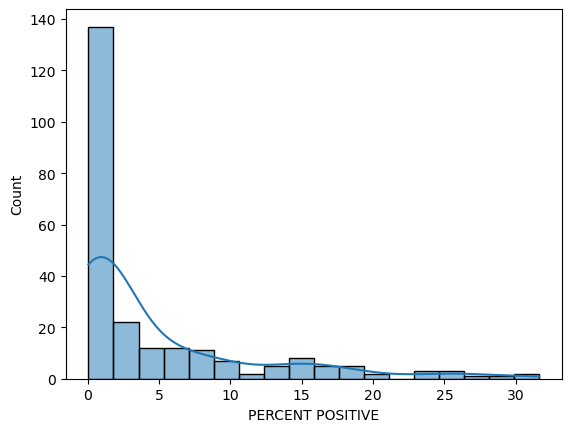

In [168]:
sns.histplot(clinico2['PERCENT POSITIVE'], kde=True)

<Axes: xlabel='TOTAL SPECIMENS', ylabel='TOTAL POSITIVE'>

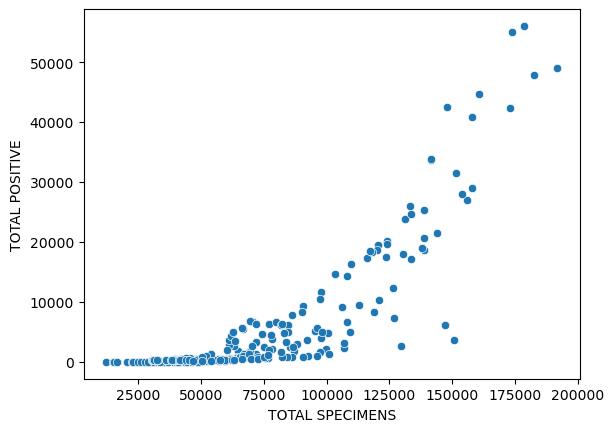

In [169]:
sns.scatterplot(data=clinico2, x='TOTAL SPECIMENS', y='TOTAL POSITIVE')

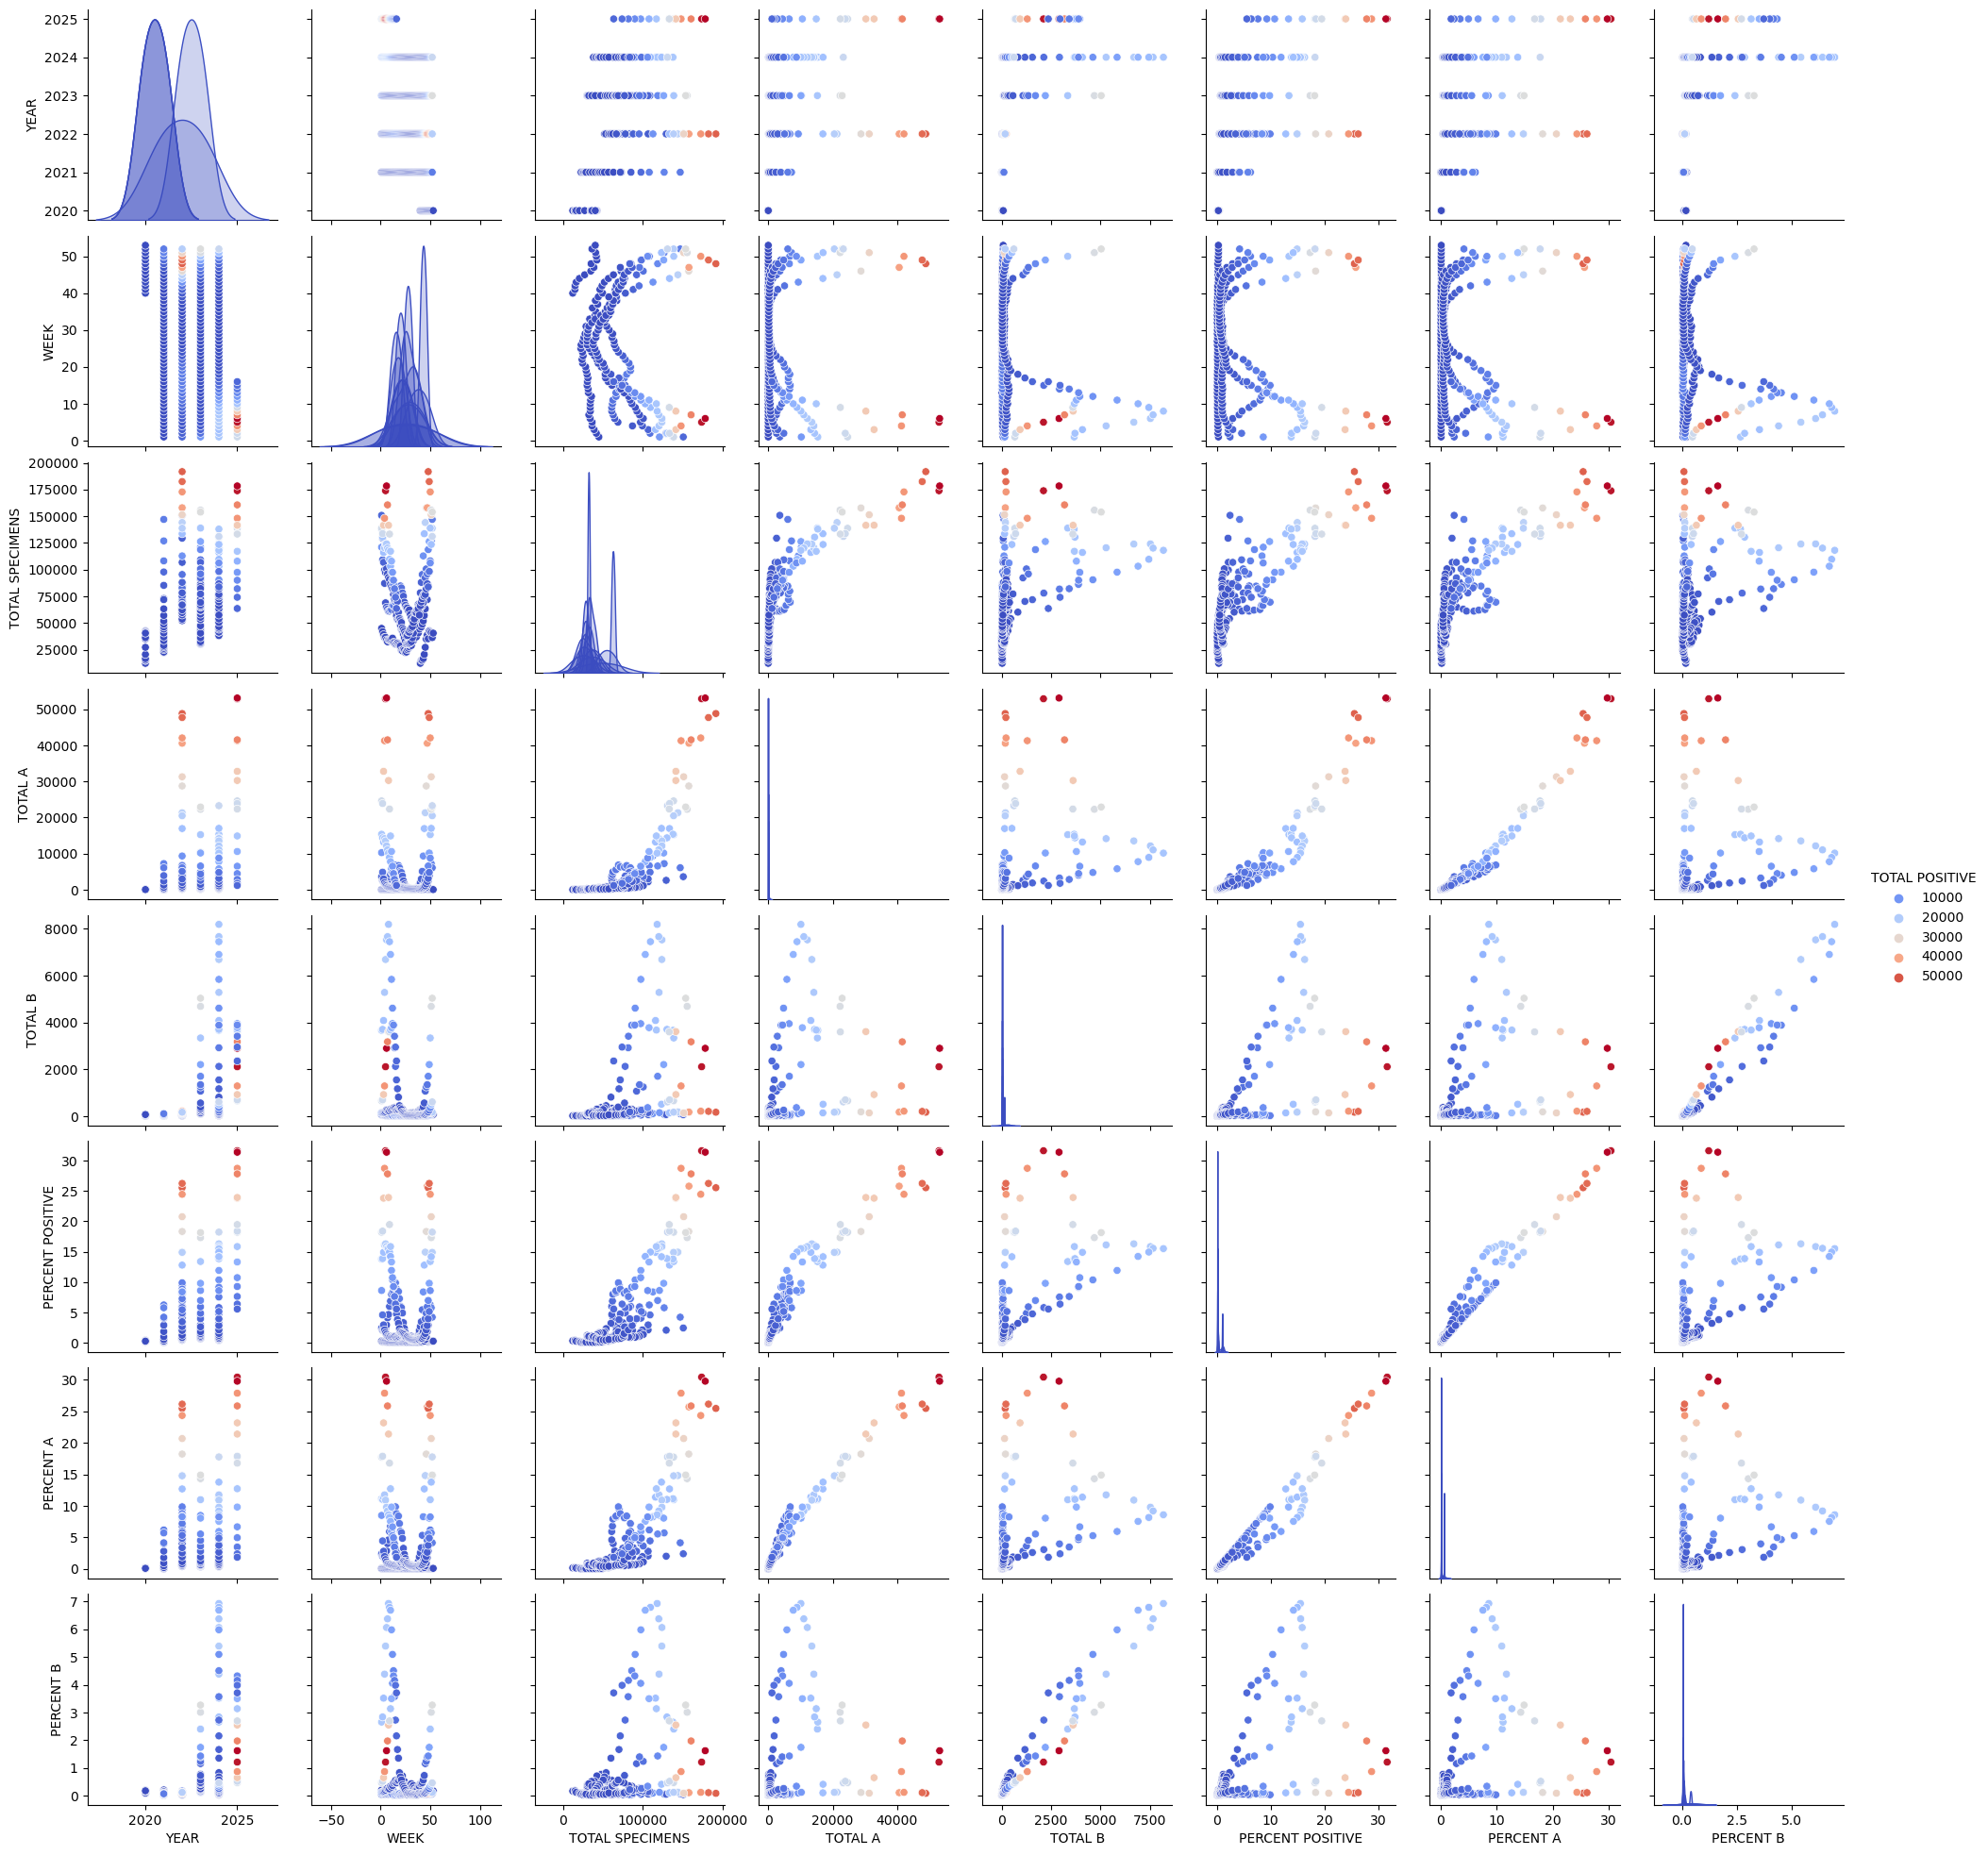

In [77]:
sns.pairplot(clinico2, diag_kind='kde', hue='TOTAL POSITIVE', palette='coolwarm')

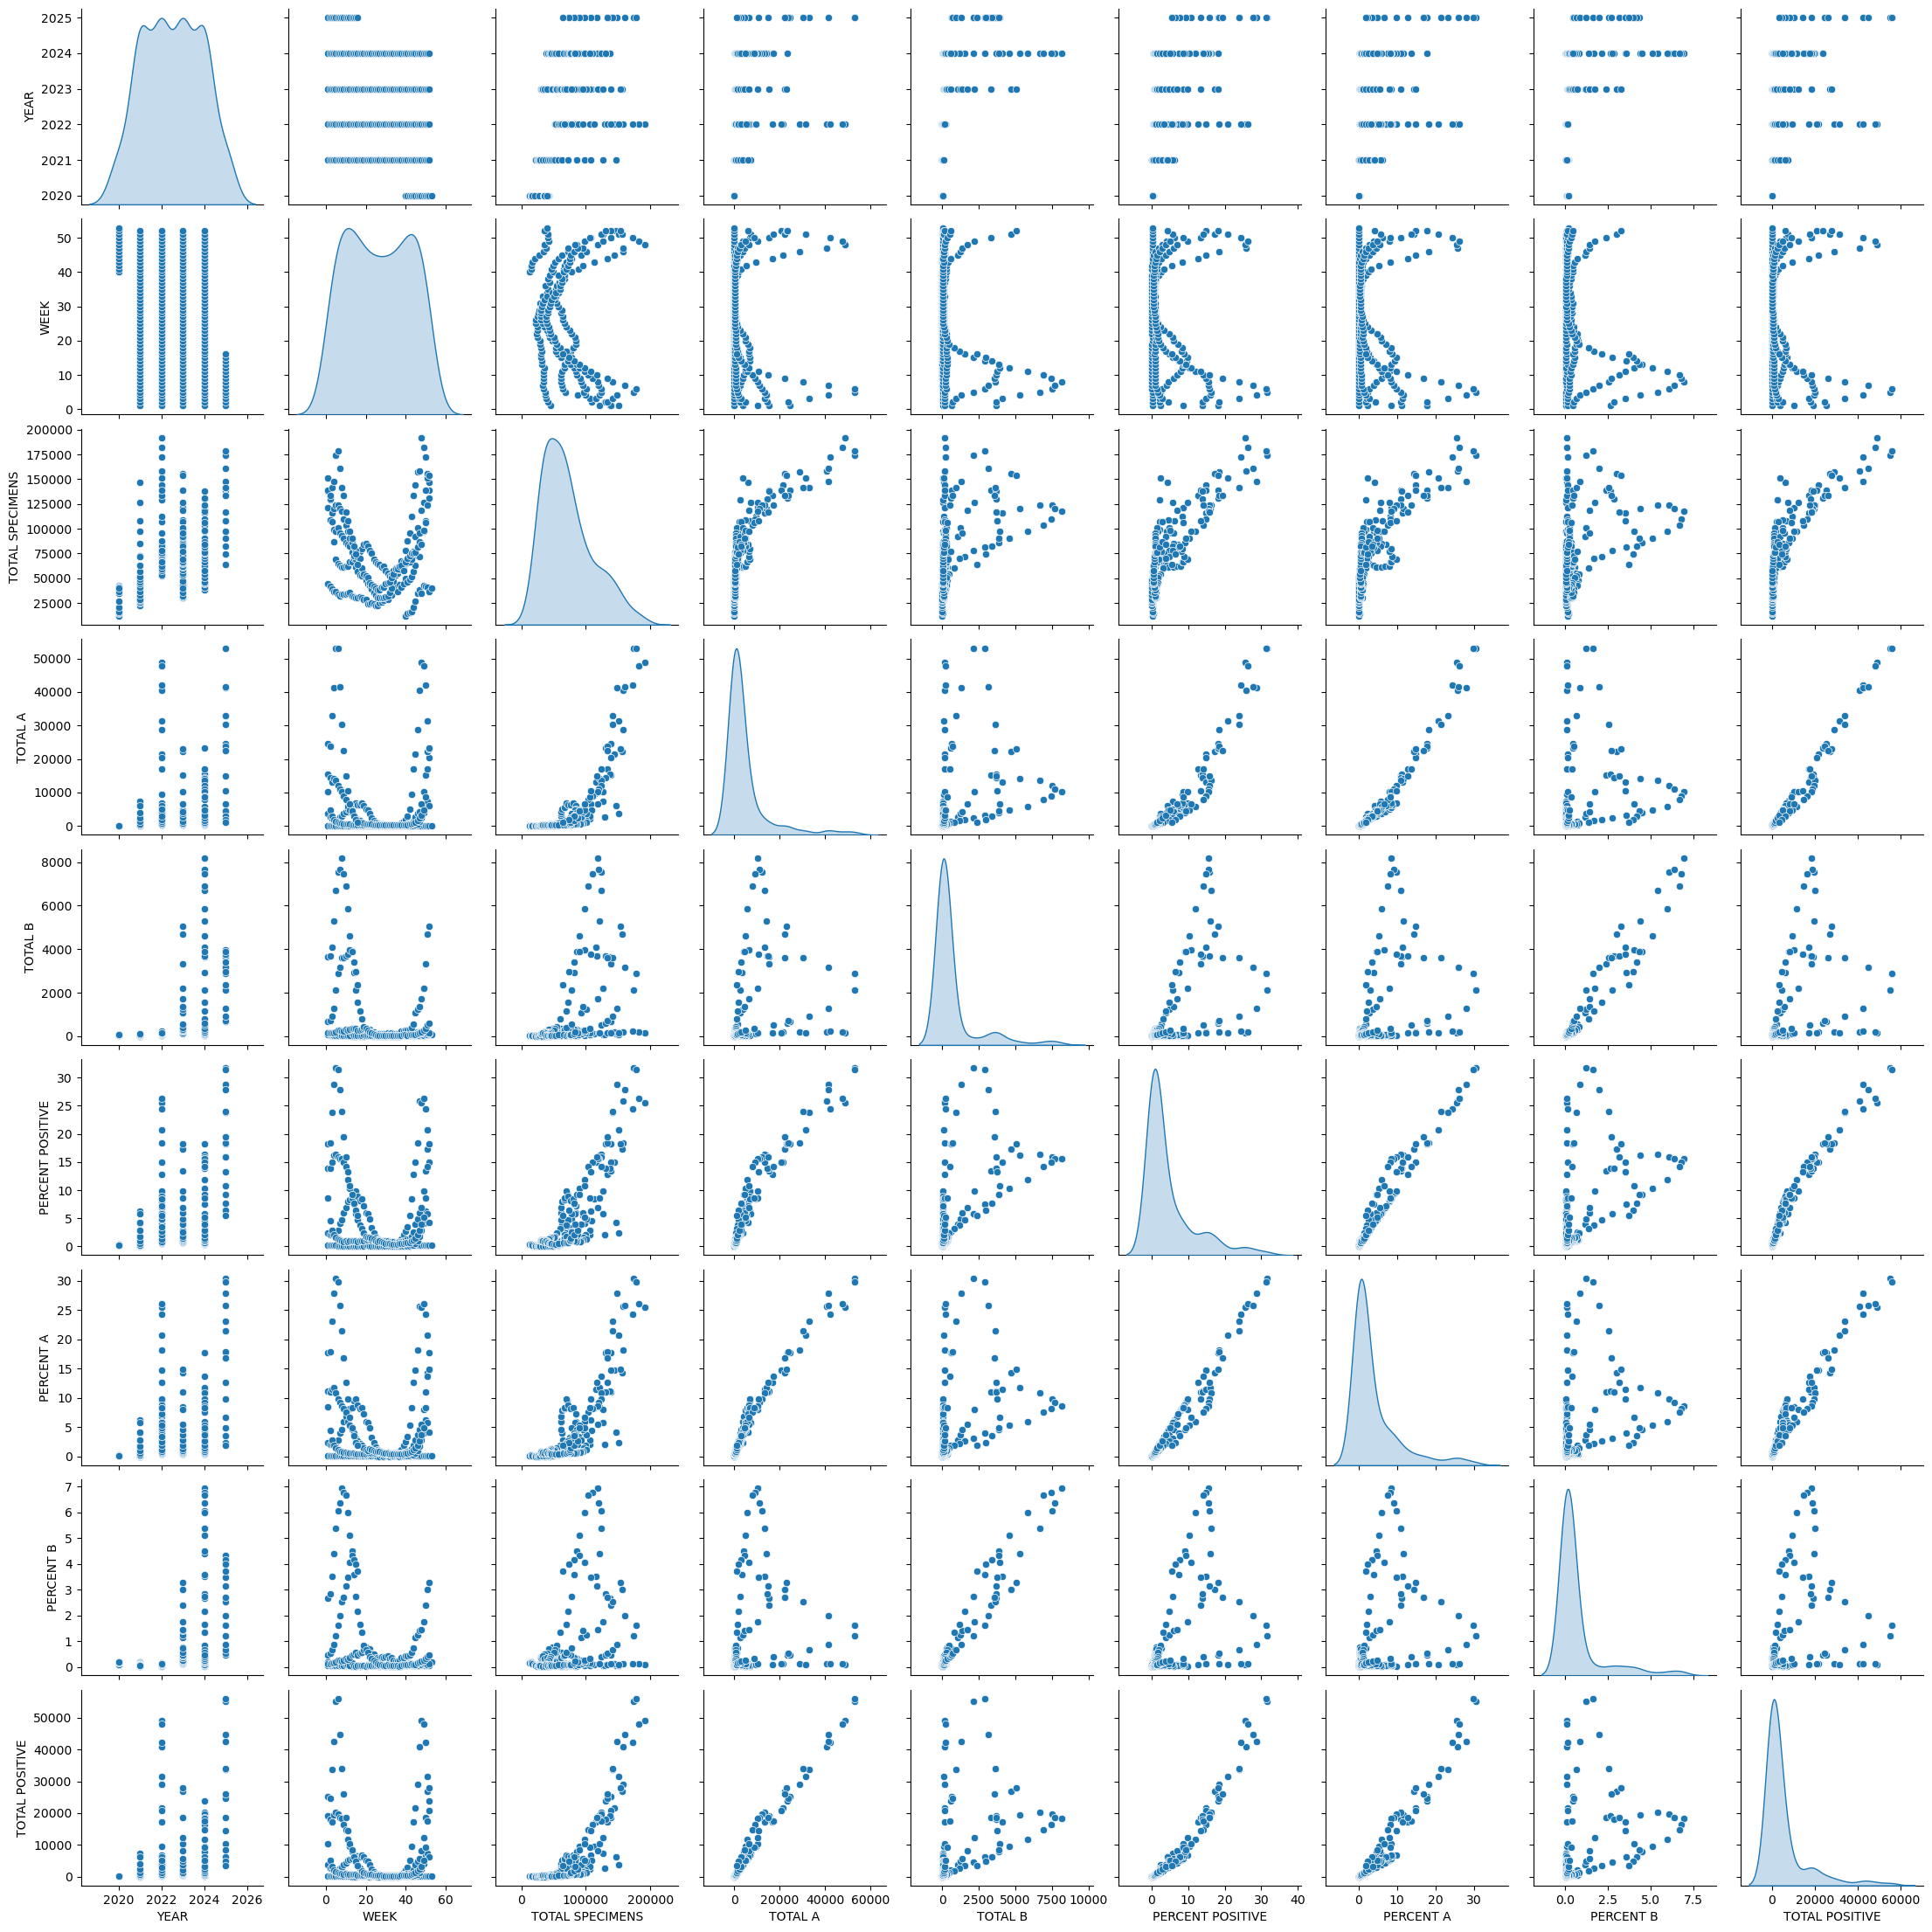

In [79]:
sns.pairplot(clinico2, diag_kind='kde')

<Axes: xlabel='YEAR', ylabel='count'>

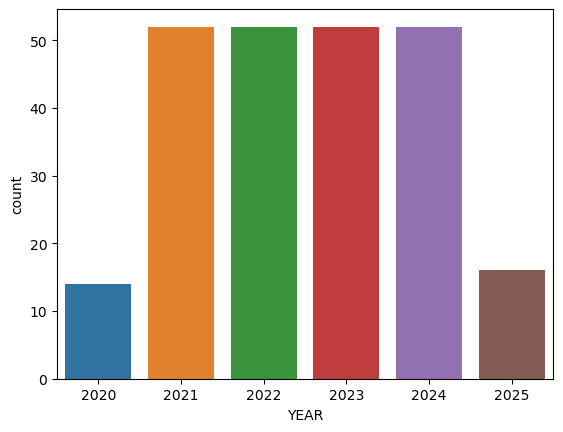

In [108]:
sns.countplot(data=clinico2, x='YEAR')

In [95]:
media_percentual = clinico2.groupby('YEAR')['PERCENT POSITIVE'].mean().reset_index()

In [96]:
media_percentual.tail()

YEAR  PERCENT POSITIVE
1  2021          0.609582
2  2022          6.770242
3  2023          2.741301
4  2024          5.539382
5  2025         18.264792

<Axes: xlabel='YEAR', ylabel='PERCENT POSITIVE'>

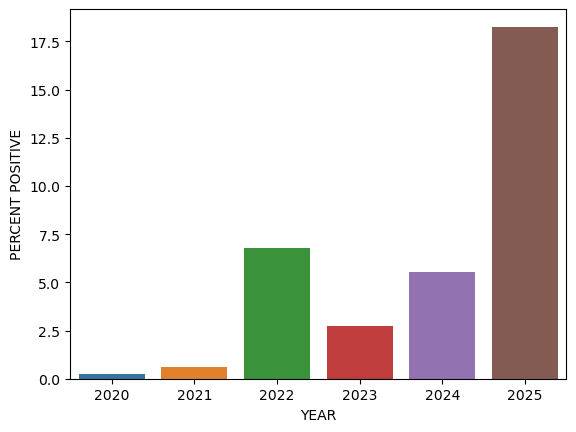

In [97]:
sns.barplot(data=media_percentual, x='YEAR', y='PERCENT POSITIVE')

# Análise da base **ICL_NREVSS_Public_Health_Labs.csv**

Esta base contém dados de **testes realizados por laboratórios de saúde pública** nos Estados Unidos.


In [102]:
publico.head()

REGION TYPE REGION  YEAR  WEEK  TOTAL SPECIMENS  A (2009 H1N1)  A (H3)  \
0    National      X  2020    40            11625              0       0   
1    National      X  2020    41            12238              3       2   
2    National      X  2020    42            11400              0       1   
3    National      X  2020    43            15744              1       1   
4    National      X  2020    44            20424              0       1   

   A (Subtyping not Performed)   B  BVic  BYam  H3N2v  A (H5)  
0                            3   2     0     0      0       0  
1                            3   5     1     0      0       0  
2                            4   5     0     0      0       0  
3                           11   4     0     0      0       0  
4                            7  13     1     2      0       0

In [104]:
publico.isnull().sum()

REGION TYPE                    0
REGION                         0
YEAR                           0
WEEK                           0
TOTAL SPECIMENS                0
A (2009 H1N1)                  0
A (H3)                         0
A (Subtyping not Performed)    0
B                              0
BVic                           0
BYam                           0
H3N2v                          0
A (H5)                         0
dtype: int64

<Axes: >

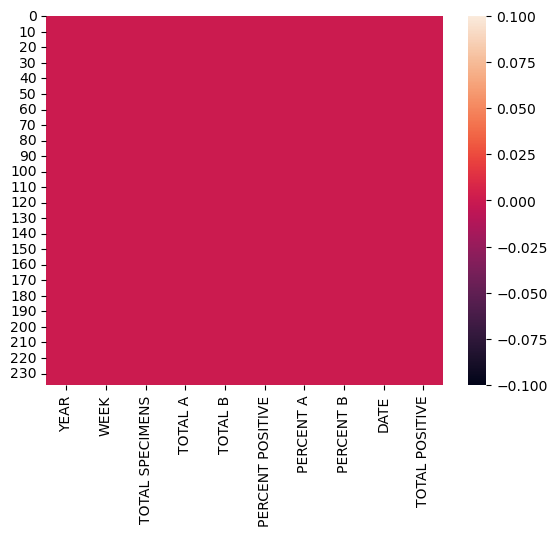

In [105]:
sns.heatmap(clinico2.isnull())

In [106]:
publico.dtypes

REGION TYPE                    object
REGION                         object
YEAR                            int64
WEEK                            int64
TOTAL SPECIMENS                 int64
A (2009 H1N1)                   int64
A (H3)                          int64
A (Subtyping not Performed)     int64
B                               int64
BVic                            int64
BYam                            int64
H3N2v                           int64
A (H5)                          int64
dtype: object

In [107]:
colunas_a_verificar = ['REGION TYPE', 'REGION']

for coluna in colunas_a_verificar:
    if publico[coluna].nunique() == 1:
        print(f"Todos os valores da coluna '{coluna}' são iguais.")
    else:
        print(f"A coluna '{coluna}' tem valores diferentes.")

Todos os valores da coluna 'REGION TYPE' são iguais.
Todos os valores da coluna 'REGION' são iguais.


In [128]:
publico2 = publico.drop(columns=['REGION', 'REGION TYPE'])

In [129]:
publico2.head()

YEAR  WEEK  TOTAL SPECIMENS  A (2009 H1N1)  A (H3)  \
0  2020    40            11625              0       0   
1  2020    41            12238              3       2   
2  2020    42            11400              0       1   
3  2020    43            15744              1       1   
4  2020    44            20424              0       1   

   A (Subtyping not Performed)   B  BVic  BYam  H3N2v  A (H5)  
0                            3   2     0     0      0       0  
1                            3   5     1     0      0       0  
2                            4   5     0     0      0       0  
3                           11   4     0     0      0       0  
4                            7  13     1     2      0       0

In [130]:
publico2['DATE'] = publico2.apply(lambda x: get_date(x['YEAR'], x['WEEK']), axis=1)

In [131]:
publico2['TOTAL A'] = publico2['A (2009 H1N1)'] + publico2['A (H3)'] + publico2['A (Subtyping not Performed)'] + publico2['A (H5)']

In [132]:
publico2['TOTAL B'] = publico2['B'] + publico2['BVic'] + publico2['BYam'] + publico2['H3N2v']

In [133]:
publico2['TOTAL POSITIVE'] = publico2['TOTAL A'] + publico2['TOTAL B']

In [134]:
publico2['PERCENT POSITIVE'] = (publico2['TOTAL POSITIVE'] / publico2['TOTAL SPECIMENS']) * 100

In [135]:
publico2.head()

YEAR  WEEK  TOTAL SPECIMENS  A (2009 H1N1)  A (H3)  \
0  2020    40            11625              0       0   
1  2020    41            12238              3       2   
2  2020    42            11400              0       1   
3  2020    43            15744              1       1   
4  2020    44            20424              0       1   

   A (Subtyping not Performed)   B  BVic  BYam  H3N2v  A (H5)       DATE  \
0                            3   2     0     0      0       0 2020-10-05   
1                            3   5     1     0      0       0 2020-10-12   
2                            4   5     0     0      0       0 2020-10-19   
3                           11   4     0     0      0       0 2020-10-26   
4                            7  13     1     2      0       0 2020-11-02   

   TOTAL A  TOTAL B  TOTAL POSITIVE  PERCENT POSITIVE  
0        3        2               5          0.043011  
1        8        6              14          0.114398  
2        5        5              10          0.087719  
3       13        4              17          0.107978  
4        8       16              24          0.117509

In [136]:
clinico2.head()

YEAR  WEEK  TOTAL SPECIMENS  TOTAL A  TOTAL B  PERCENT POSITIVE  PERCENT A  \
0  2020    40            12200       19       21          0.327869   0.155738   
1  2020    41            14924       30       28          0.388636   0.201018   
2  2020    42            15112       27       26          0.350715   0.178666   
3  2020    43            16611       21       21          0.252845   0.126422   
4  2020    44            20552       22       19          0.199494   0.107046   

   PERCENT B       DATE  TOTAL POSITIVE  
0   0.172131 2020-10-05              40  
1   0.187617 2020-10-12              58  
2   0.172049 2020-10-19              53  
3   0.126422 2020-10-26              42  
4   0.092448 2020-11-02              41

In [137]:
publico2['PERCENT A'] = (publico2['TOTAL A'] / publico2['TOTAL SPECIMENS']) * 100

In [138]:
publico2['PERCENT B'] = (publico2['TOTAL B'] / publico2['TOTAL SPECIMENS']) * 100

In [139]:
publico2 = publico2.drop(columns=['A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v', 'A (H5)'])

In [140]:
publico2.head()

YEAR  WEEK  TOTAL SPECIMENS       DATE  TOTAL A  TOTAL B  TOTAL POSITIVE  \
0  2020    40            11625 2020-10-05        3        2               5   
1  2020    41            12238 2020-10-12        8        6              14   
2  2020    42            11400 2020-10-19        5        5              10   
3  2020    43            15744 2020-10-26       13        4              17   
4  2020    44            20424 2020-11-02        8       16              24   

   PERCENT POSITIVE  PERCENT A  PERCENT B  
0          0.043011   0.025806   0.017204  
1          0.114398   0.065370   0.049028  
2          0.087719   0.043860   0.043860  
3          0.107978   0.082571   0.025407  
4          0.117509   0.039170   0.078339

<Axes: xlabel='TOTAL SPECIMENS', ylabel='Count'>

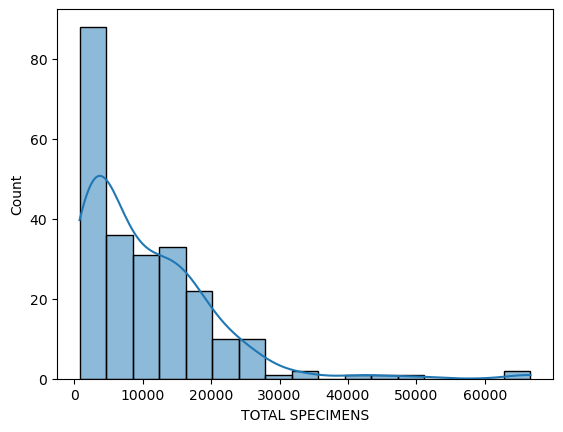

In [142]:
sns.histplot(publico2['TOTAL SPECIMENS'], kde=True)

In [143]:
publico2.corr(numeric_only=True)

YEAR      WEEK  TOTAL SPECIMENS   TOTAL A   TOTAL B  \
YEAR              1.000000 -0.278239        -0.584617  0.451697  0.553091   
WEEK             -0.278239  1.000000        -0.022493 -0.145656 -0.268752   
TOTAL SPECIMENS  -0.584617 -0.022493         1.000000 -0.026774 -0.329999   
TOTAL A           0.451697 -0.145656        -0.026774  1.000000  0.372614   
TOTAL B           0.553091 -0.268752        -0.329999  0.372614  1.000000   
TOTAL POSITIVE    0.482101 -0.162914        -0.053083  0.997068  0.442530   
PERCENT POSITIVE  0.748974 -0.140395        -0.367734  0.800269  0.677141   
PERCENT A         0.714724 -0.109569        -0.329249  0.851525  0.579791   
PERCENT B         0.570728 -0.237497        -0.396091  0.140008  0.870992   

                  TOTAL POSITIVE  PERCENT POSITIVE  PERCENT A  PERCENT B  
YEAR                    0.482101          0.748974   0.714724   0.570728  
WEEK                   -0.162914         -0.140395  -0.109569  -0.237497  
TOTAL SPECIMENS        -0.053083         -0.367734  -0.329249  -0.396091  
TOTAL A                 0.997068          0.800269   0.851525   0.140008  
TOTAL B                 0.442530          0.677141   0.579791   0.870992  
TOTAL POSITIVE          1.000000          0.829169   0.870673   0.207115  
PERCENT POSITIVE        0.829169          1.000000   0.988327   0.579886  
PERCENT A               0.870673          0.988327   1.000000   0.449001  
PERCENT B               0.207115          0.579886   0.449001   1.000000

<Axes: >

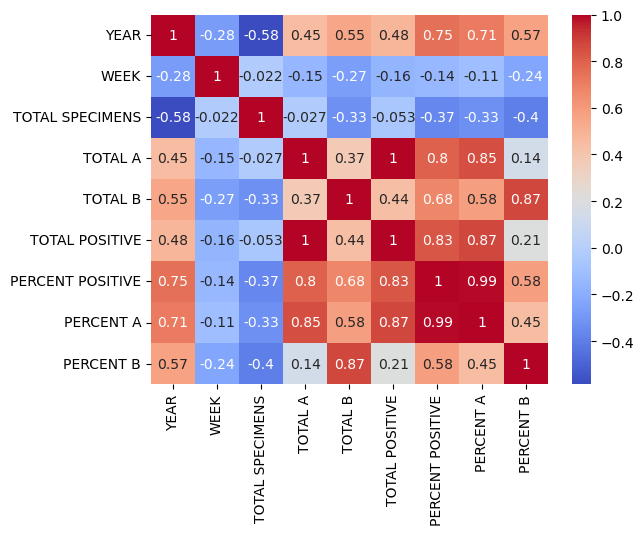

In [145]:
sns.heatmap(publico2.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='TOTAL A', ylabel='TOTAL POSITIVE'>

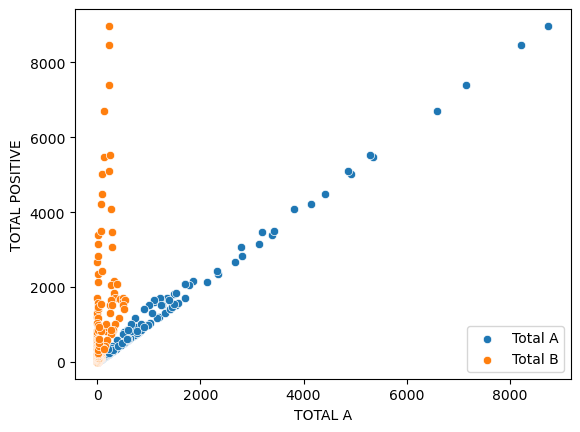

In [150]:
sns.scatterplot(x=publico2['TOTAL A'], y=publico2['TOTAL POSITIVE'], label='Total A')
sns.scatterplot(x=publico2['TOTAL B'], y=publico2['TOTAL POSITIVE'], label='Total B')

<Axes: >

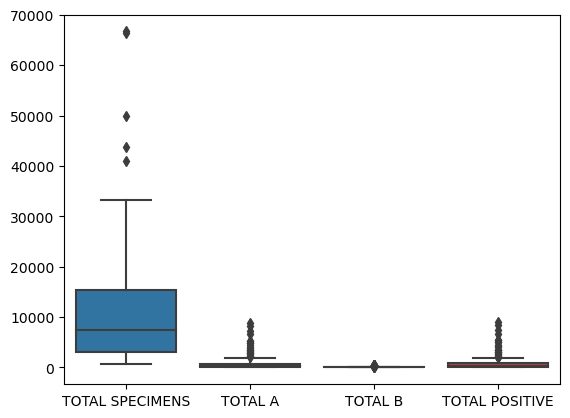

In [151]:
sns.boxplot(data=publico2[['TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'TOTAL POSITIVE']])

<Axes: xlabel='YEAR', ylabel='PERCENT POSITIVE'>

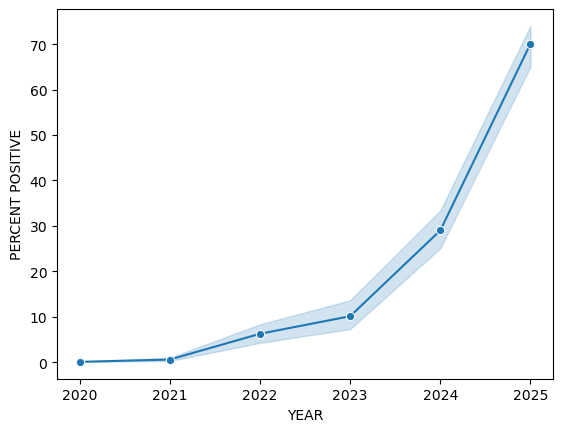

In [152]:
sns.lineplot(data=publico2, x='YEAR', y='PERCENT POSITIVE', marker='o')

<Axes: xlabel='WEEK', ylabel='TOTAL SPECIMENS'>

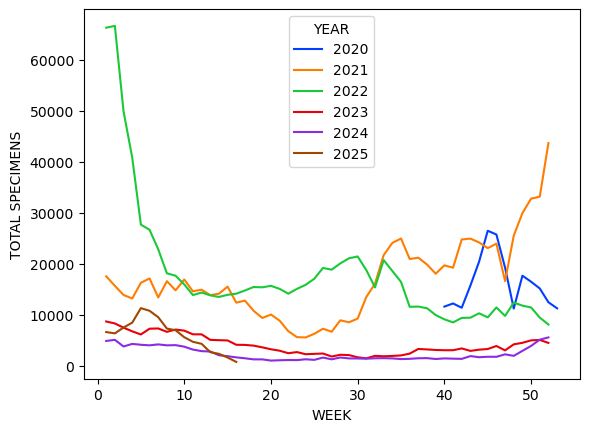

In [153]:
sns.lineplot(data=publico2, x='WEEK', y='TOTAL SPECIMENS', hue='YEAR', palette='bright')

<Axes: xlabel='WEEK', ylabel='PERCENT POSITIVE'>

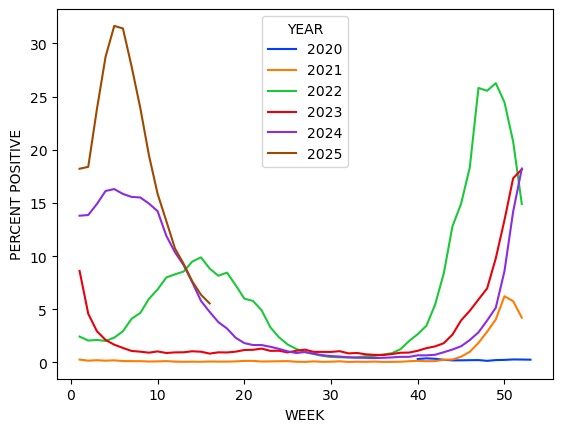

In [155]:
sns.lineplot(data=clinico2, x='WEEK', y='PERCENT POSITIVE', hue='YEAR', palette='bright')

<Axes: xlabel='PERCENT POSITIVE', ylabel='Count'>

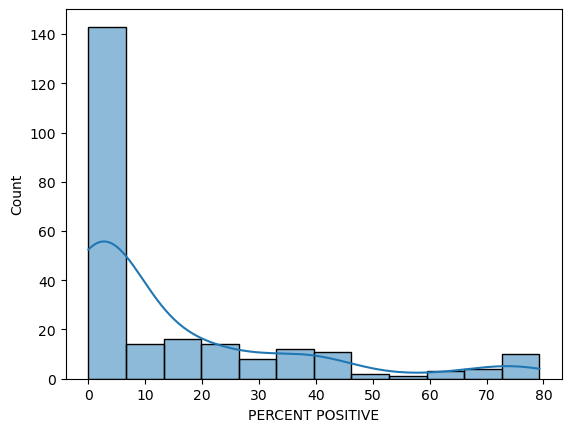

In [157]:
sns.histplot(publico2['PERCENT POSITIVE'], kde=True)

<Axes: xlabel='TOTAL SPECIMENS', ylabel='TOTAL POSITIVE'>

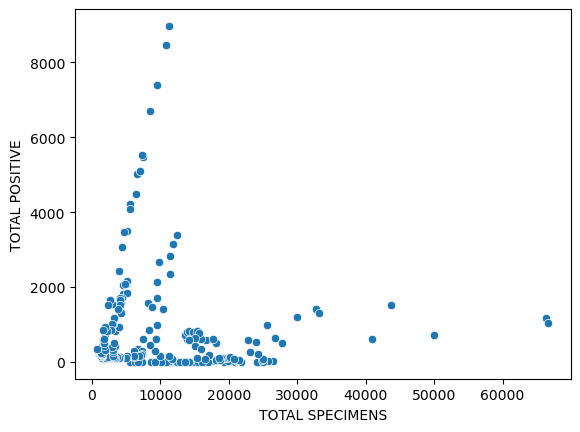

In [158]:
sns.scatterplot(data=publico2, x='TOTAL SPECIMENS', y='TOTAL POSITIVE')

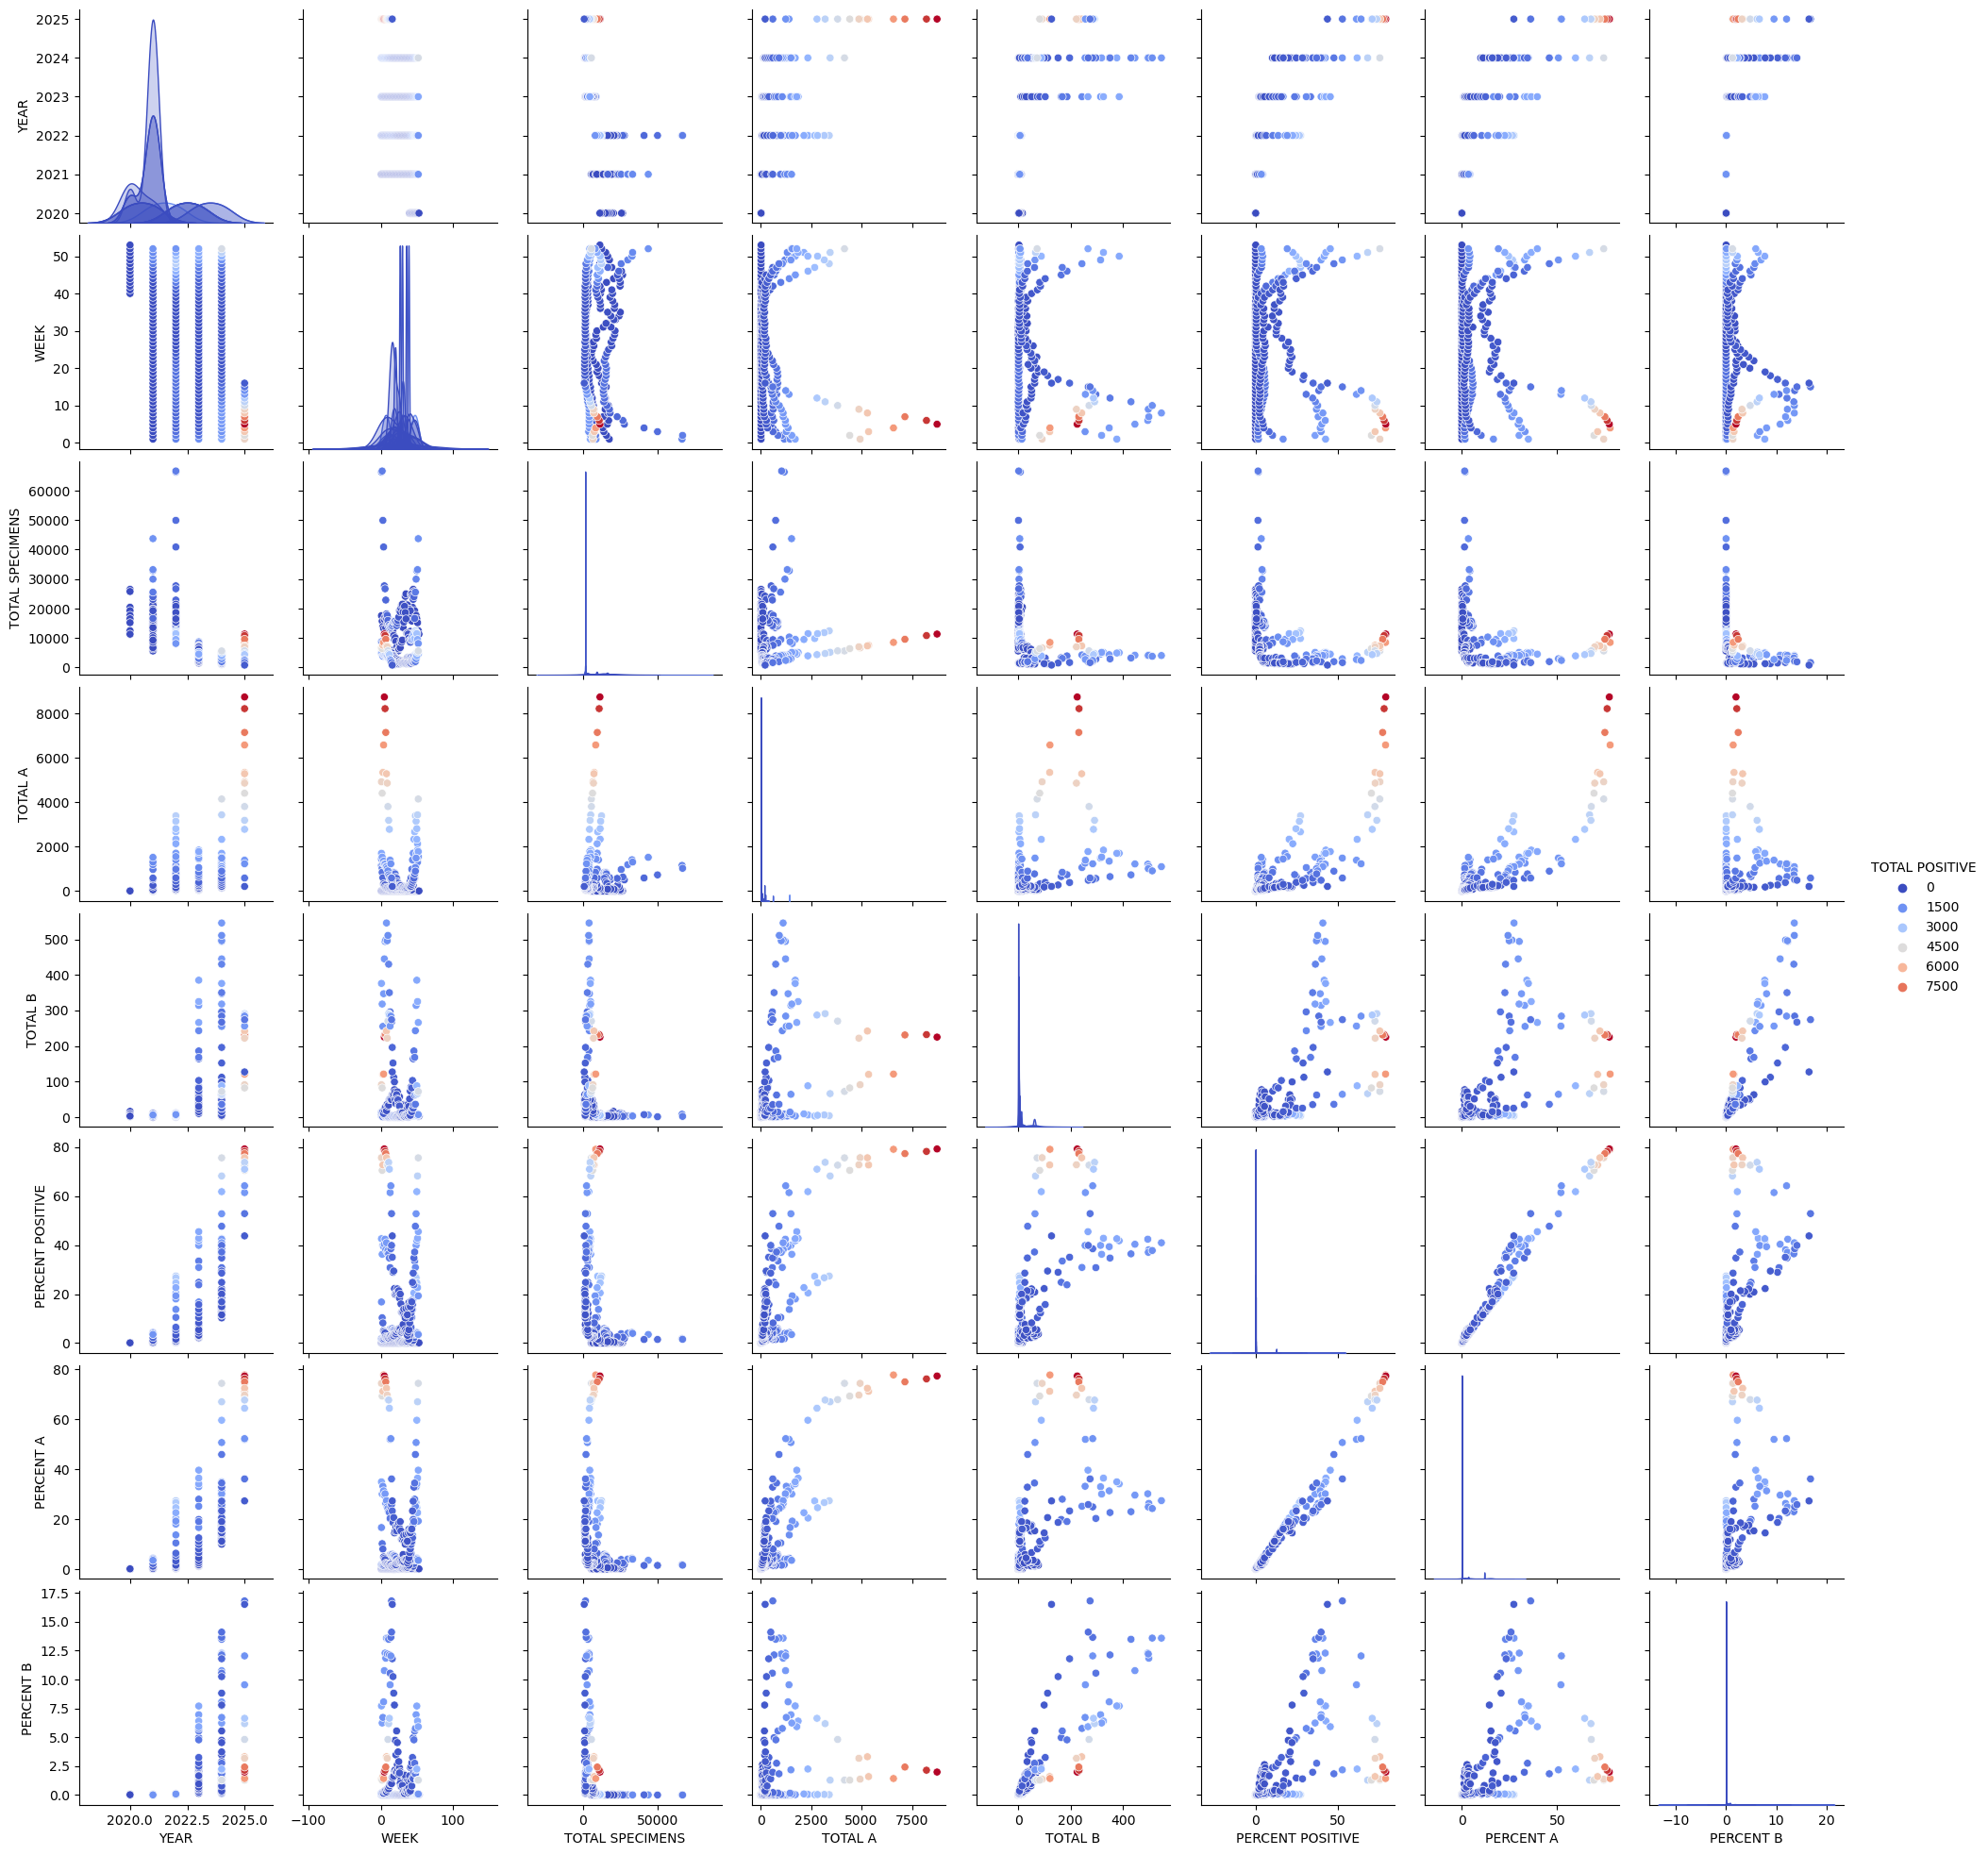

In [159]:
sns.pairplot(publico2, diag_kind='kde', hue='TOTAL POSITIVE', palette='coolwarm')

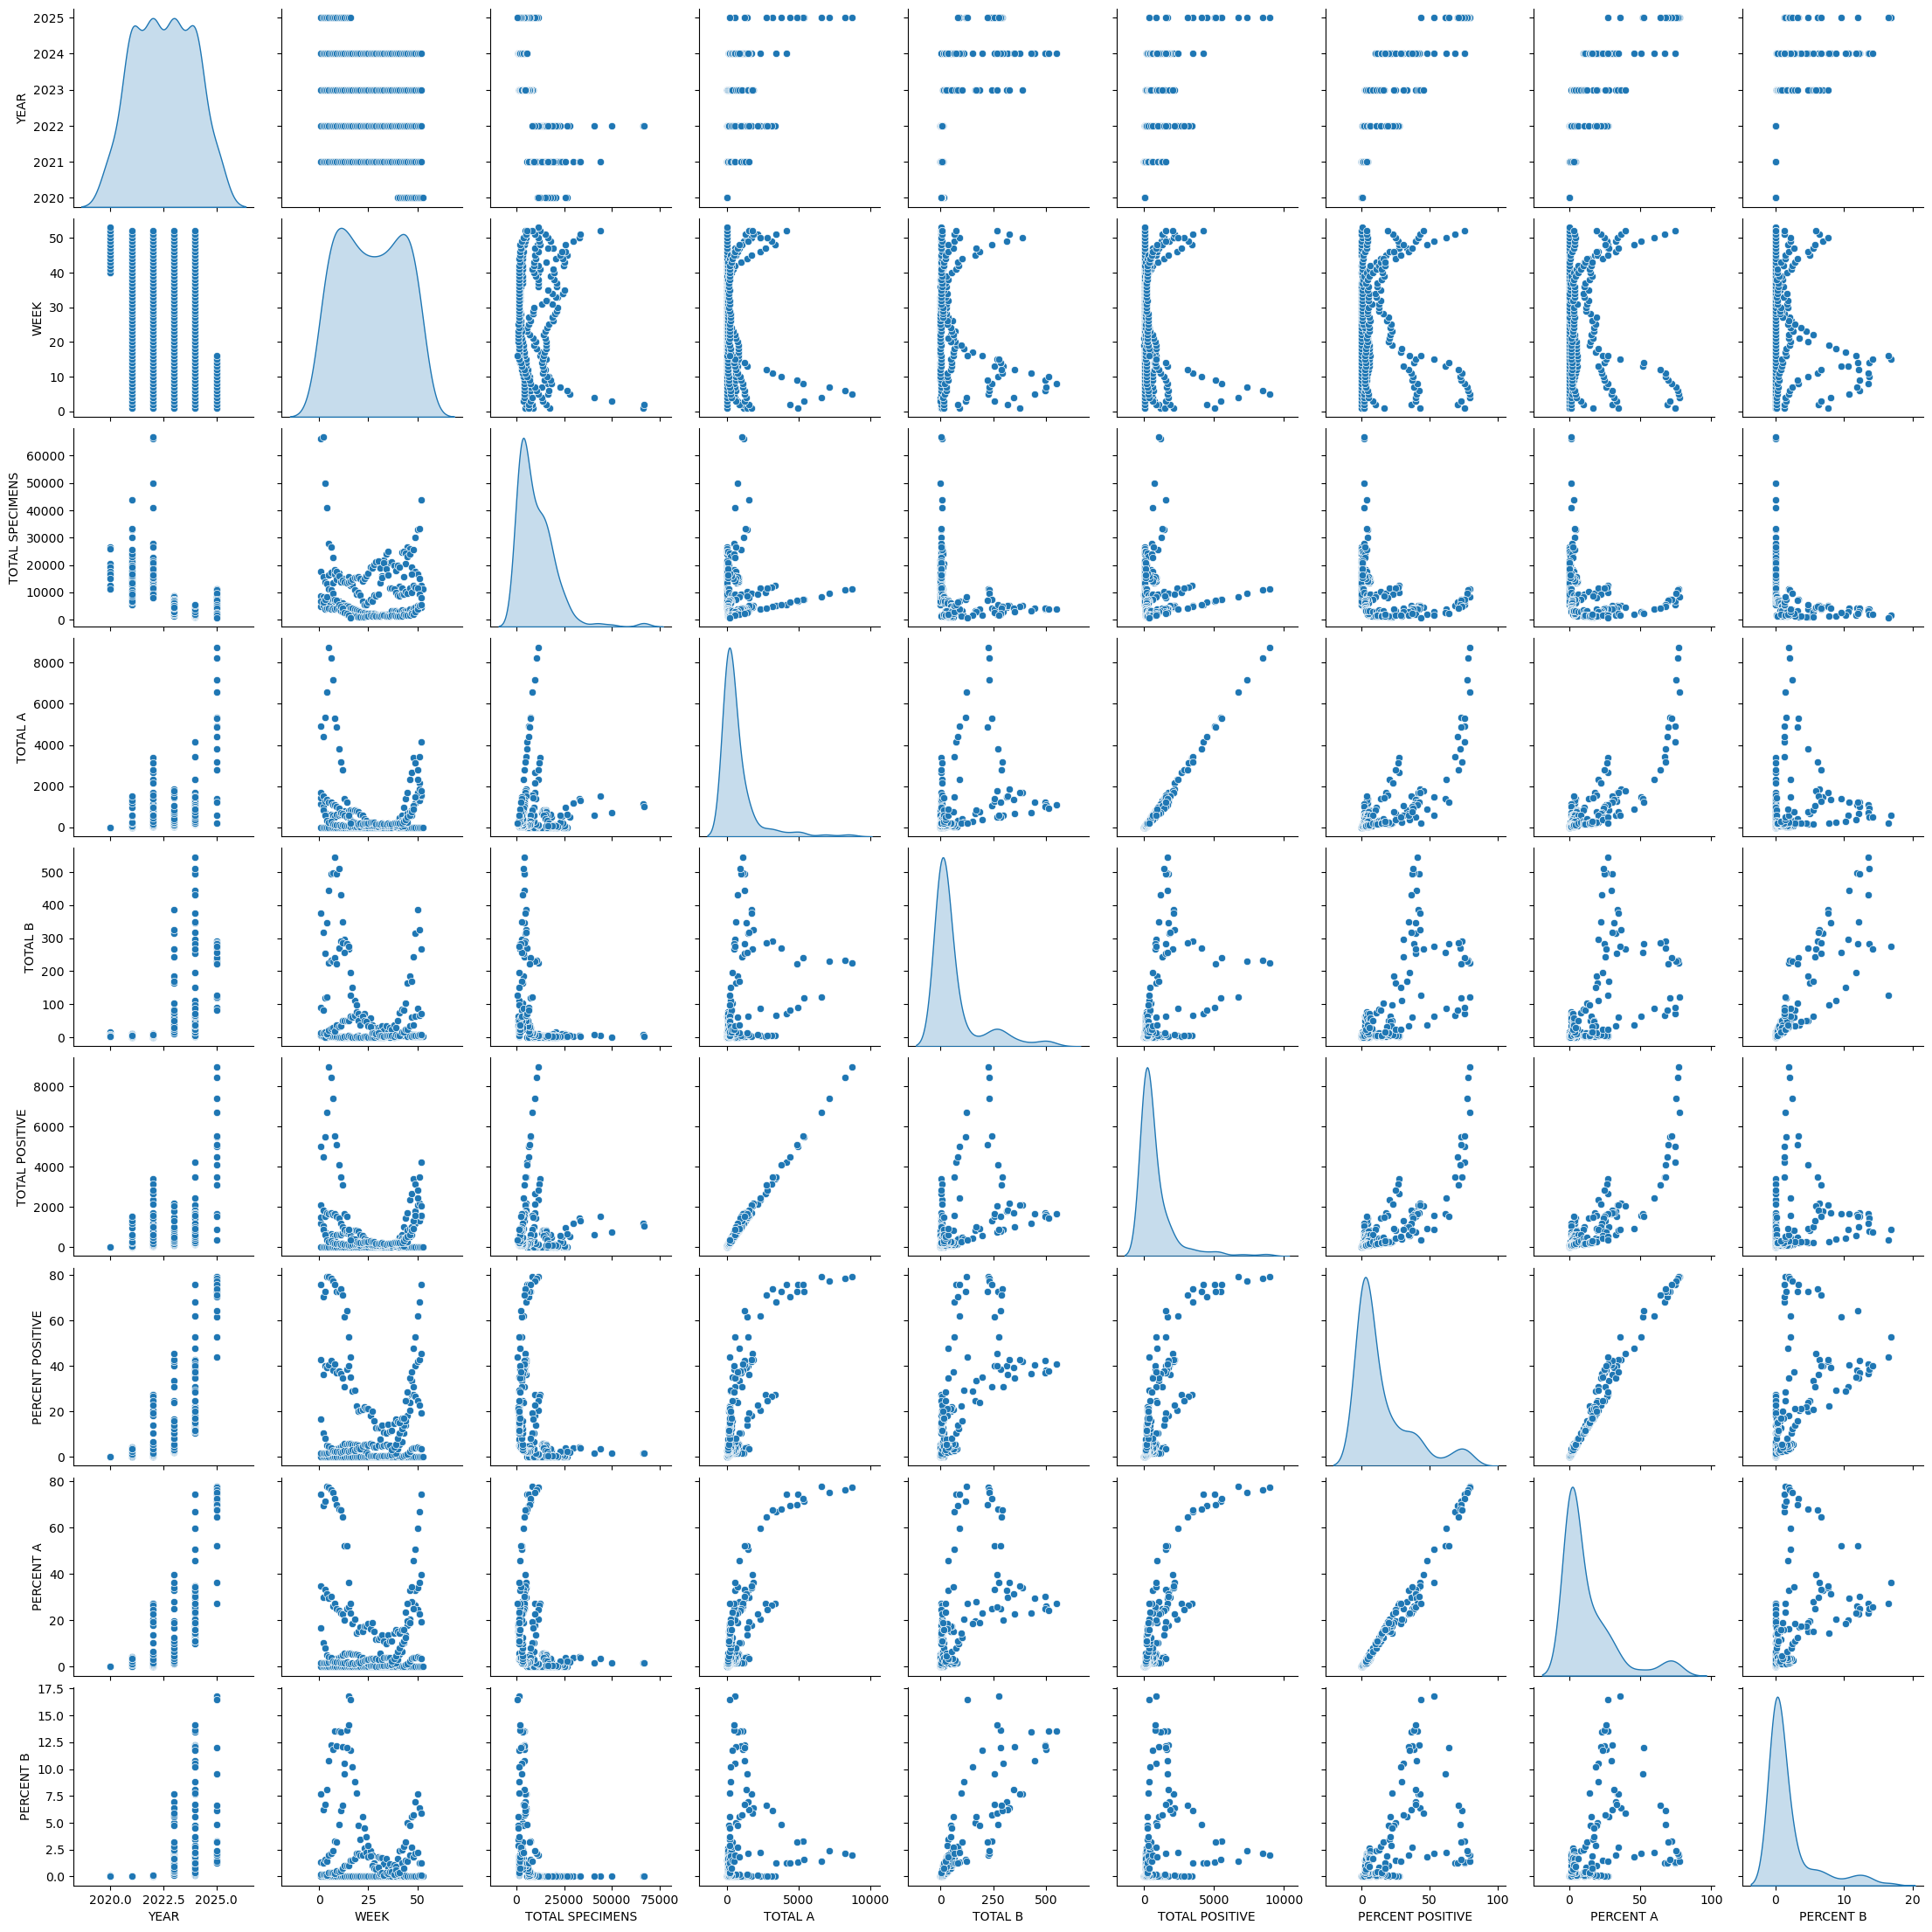

In [160]:
sns.pairplot(publico2, diag_kind='kde')

<Axes: xlabel='YEAR', ylabel='count'>

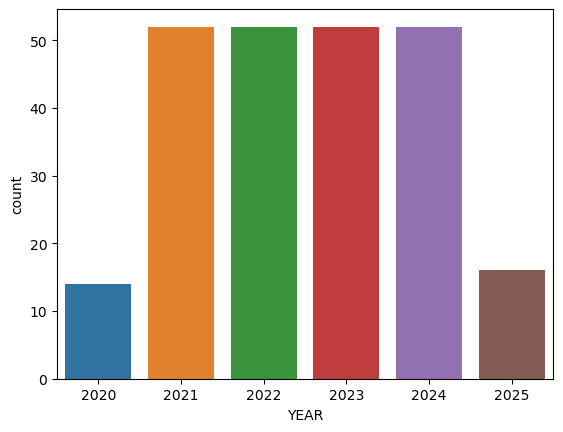

In [161]:
sns.countplot(data=publico2, x='YEAR')

In [162]:
media_percentual_publico = publico2.groupby('YEAR')['PERCENT POSITIVE'].mean().reset_index()

<Axes: xlabel='YEAR', ylabel='PERCENT POSITIVE'>

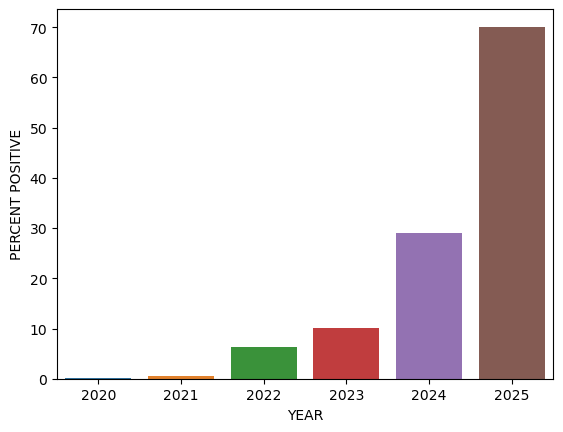

In [163]:
sns.barplot(data=media_percentual_publico, x='YEAR', y='PERCENT POSITIVE')